### Latex Macros
$\newcommand{\Re}[1]{{\mathbb{R}^{{#1}}}}$

In [31]:
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import networkx as nx

# Advanced Graduate Seminar

***
## Graph Neural Networks (GNNs)

### Objectives
- Understand the graph taxonomy
- Why are graphs useful?
- Understand the different classes of tasks? 
- Understand the relationship between GNNs and CNNs
- Understand the difference between spectral and spatial theories
- Understand node, edge, and graph embedidngs and their uses
- Learn to read and present papers

***
## Seminar Structure
### Lectures on topics such as: 
- applications of graphs
- types of graphs
- overall structure of a GNN
- spectral versus spatial representations
    
### Student presentations
- Each student will review up to three papers   
- The instructor(s) will give students a problem to solve based on the papers
- The student will present the problem to the class via coding and/or illustrative examples
- The student will use papers, blogs, books to help understand the necessary materials to accomplish the task
- All coding will us the PyTorch library
- The code base will be Pytorch code provided by Luke van Poppering. This code will be extended and refactored as necessary. 
- A new notebook will be created for each project
- Based on a predetermined section of the Hamilton book, a student will prepare a homework to demonstrate the section content. 
- The student will have one week to figure out and the homework to demonstrate. The student will then share this with the instructor(s). 
- The following week, the student will present the homework to the rest of the class, who will solve the problem and return the solutions to the instructors. 
- The following Monday, the faculty (preferably the student) will present the solution to the class, which will also be discussed). 
- the first homework will be presented 4-5 weeks after the start of the class. 

Possible lectures in the first month: 
- Lesson 1: introduction to machine learning with graphs
- Lesson 2: the spectral landscape
- Lesson 3: the spatial landscape
- Lesson 4: calculating embeddings and executing a downstream task
- Lesson 5: deconstruction of Luke's code

***
## Graph Types
- Directed and undirected graphs
- Homogenenous and heterogeneous graphs
- Cyclic and acyclic graphs
- Multigraphs
- Multilayer graphs
- Hypergraphs
- Dynamic graphs

***
## What is a graph? 
A graph is a collection of nodes $v_i\in V$, $i=0,...,N-1$, and edges $e_i\in E$, $i=0,\cdots,|E|-1$.
$V$ is the set of nodes, and $E$ is the set of edges. $|V|$ and $|E|$ are set cardinalities. 

### Edges
- Each edge connects two nodes. 
- In a hypergraph, an edge connects two or more nodes. 

### Nodes
- node degree: the number of edges attached to the node
- for directed graphs: 
  - in-degree: number of nodes arriving at the node

***
### Adjacency Matrix
The adjacent matrix $A$ characterizes the structure of the graph. 
If a graph of $N=|V|$ nodes $v_i$, $i=0,\cdots,N-1$, the matrix $A$ is an $N\times N$ matrix with $$A_{i,j}=\{0,1\}$$
If $A_{i,j}=1$, there is an edge from node $v_i$ to node $v_j$. 
If a graph is undirected, $A$ is symmetric. Thus, both $A_{i,j}$ and $A_{j,i}$ have the same value. If there is a self-loop (an edge from $v_i$ to $v_i$, the diagonal element $A_{i,i}=1$. 

Now consider the sum of the $i^{th}$ row of $A$: $D_i = \sum_{j} A_{i,j}$. By definition, $D_i$ is the degree of $v_i$, i.e., the number of edges that impinge on $v_i$. 

Consider the following matrix $A$:
\begin{equation}
A = \begin{bmatrix}
0 & 1 & 0 \\
1 & 0 & 1 \\
1 & 0 & 0
\end{bmatrix}
\end{equation}

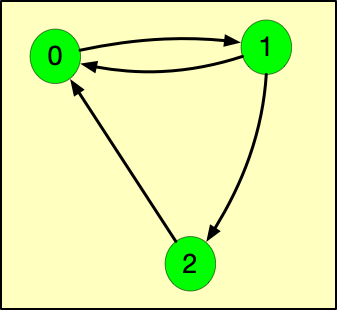

- Node 0 has outgoing degree 1
- Node 1 has outgoing degree 2
- Node 2 has outgoing degree 1

The rows of $A^T$ (or the columns of $A$), when summed generate the incoming degrees of the three nodes:
- Node 0 has incoming degree 2
- Node 1 has incoming degree 1
- Node 2 has incoming degree 1

For undirected graphs, the adjacency matrix is symmetric. The degree are computed by summing up either the rows or the columns corresponding to a particular node (row $i$ or column $i$). The adjacency matrix for the graph below is: 

\begin{equation}
A = \begin{bmatrix}
0 & 1 & 1 & 0 \\
1 & 0 & 1 & 1 \\
1 & 1 & 0 & 1 \\
0 & 1 & 1 & 0 
\end{bmatrix}
\end{equation}

By summing up the rows, the degrees of nodes 0 through 3 are respectively 2, 3, 3, and 2.


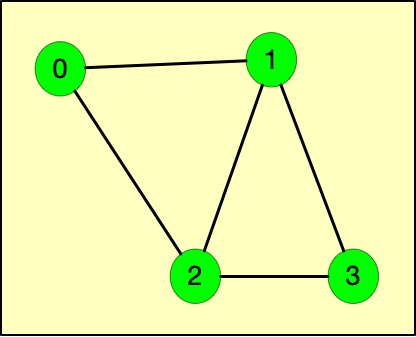

***
### Interactive example of graph generation
- Learn to use the ipywidgets library in iPython
- Generate three different types of graph, with control over the number of nodes, edge generation probability, and the random seed. 
- The three types of graphs generated are binomial, Watts-Strogatz, and powerlaw with cluster. 

In [32]:
prob_slider = widgets.FloatSlider(min=0, max=1, step=0.1, value=0.5)
node_slider = widgets.IntSlider(min=3, max=30, step=1, value=10)
nb_neigh_slider = widgets.IntSlider(min=1, max=10, step=1, value=4)
nb_edges_per_node_slider = widgets.IntSlider(min=1, max=20, step=2, value=5)
graph_type = ["binomial", "connected_watts_strogatz", "powerlaw_cluster_graph"]


@interact(
    nb_nodes=node_slider,
    prob=prob_slider,
    nb_neigh=nb_neigh_slider,
    nb_edges_per_node=nb_edges_per_node_slider,
    seed=100,
    graph_type=graph_type,
    directed=True,
)
def drawGraph(nb_nodes, nb_neigh, prob, seed, nb_edges_per_node, directed, graph_type):
    if graph_type == "binomial":
        nb_edges_per_node_slider.style.handle_color = 'red'
        nb_neigh_slider.style.handle_color = 'red'
        edge_prob = prob
        G = nx.binomial_graph(nb_nodes, edge_prob, seed=seed, directed=directed)
    elif graph_type == "connected_watts_strogatz":
        nb_edges_per_node_slider.style.handle_color = 'red'
        nb_neigh_slider.style.handle_color = 'black'
        nb_tries = 20
        edge_prob = prob
        G = nx.connected_watts_strogatz_graph(
            nb_nodes, nb_neigh, edge_prob, nb_tries, seed
        )
    elif graph_type == "powerlaw_cluster_graph":
        nb_neigh_slider.style.handle_color = 'red'
        nb_edges_per_node_slider.style.handle_color = 'black'
        add_tri_prob = prob
        if nb_edges_per_node >= nb_nodes:
            nb_edges_per_node = nb_nodes - 1
        G = nx.powerlaw_cluster_graph(nb_nodes, nb_edges_per_node, add_tri_prob, seed)
    # nx.draw(G)
    nx.draw_shell(G)  # shell layout

interactive(children=(IntSlider(value=10, description='nb_nodes', max=30, min=3), IntSlider(value=4, descripti…

### Some remarks
- directed edges can connect nodes $i$ and $j$ in both directions
- when edge_prob=1, all possible nodes are drawn
- slider handles are red when the slider does not apply. Ideally, I would make the slider
  invisible, which is possible, but then I get blank lines, and sometimes overlapping lines. 

***
## Graph generation from the adjacency matrix (Interactive)
* Generate an adjacency matrix of size NxN with self-loops. 
* Display the graph
* The self-loops (with or without arrows) are not drawn. 

In [33]:
import numpy as np
#import pylab
from networkx.drawing.nx_agraph import to_agraph

In [34]:
layout = ['circular','planar','random']
@interact(N=5, symmetric=True, layout=layout)
def generate_graph_from_adjacency_matrix(N, symmetric, layout):
    """
    Arguments
    N: number of nodes
    """
    ints = np.random.randint(0, 2, N * N).reshape(N, N)
    if symmetric:
        ints = ints + ints.transpose()
        ints = np.clip(ints, 0, 1)
    # construct edge list
    labels = range(0,N)
    G = nx.DiGraph(ints)
    # Generate an NxN adjacency matrix of 0 and 1 with self-loops
    if (layout == 'circular'): pos = nx.circular_layout(G)
    elif (layout == 'planar'): pos = nx.planar_layout(G)
    else: pos = nx.random_layout(G)
    nx.draw(G, pos)
    
    # add graphviz layout options (see https://stackoverflow.com/a/39662097)
    #G.graph['edge'] = {'arrowsize': '0.6', 'splines': 'curved'}
    #G.graph['graph'] = {'scale': '3'}
    

    #nx.write_dot(G, 'write_dot')
    #nx.draw_shell(G, with_labels=True, arrowstyle="<|-", style='solid')
    # Draw the newly added self-loops with different formatting
    #nx.draw_networkx_edges(G, pos, edgelist=edgelist, arrowstyle="<|-", style="dashed")
    print("Adjacency Matrix: \n", ints)

interactive(children=(IntSlider(value=5, description='N', max=15, min=-5), Checkbox(value=True, description='s…

***
### Features
#### Node feature example
- Assume a network with $N$ nodes
- Each node has the following three features: sex (M/F), income (L/M/H), weight
- Sex and income feature will be transformed into one-hot encoded vectors. Weight is a float, and will remain as is.
- Store the feature into a matrix XV of shape [:, 6]. 
- Note: with a feature with two components, a single component is sufficient to reconstruct the feature. So is the second component required in the Neural Network? Answer: I am not sure. Better safe than sorry, so I am keeping int. 

In [35]:
# The features are random
N = 100
# Sex: Male (M), Female (F)
M = np.random.randint(0,2, N)
F = 1 - M
income = np.random.randint(0, 3, N)
income_low, income_med, income_high = [(income == i) + 0 for i in (0,1,2)]
weight = 150 + 40 * np.random.randn(N)
# Construct the feature matrix XV
XV = np.stack((M,F,income_low, income_med, income_high, weight), axis=1)
XV.shape, XV[0:5,:]

((100, 6),
 array([[  1.        ,   0.        ,   1.        ,   0.        ,
           0.        , 125.24709833],
        [  0.        ,   1.        ,   0.        ,   0.        ,
           1.        , 125.09742418],
        [  0.        ,   1.        ,   1.        ,   0.        ,
           0.        , 171.05324552],
        [  1.        ,   0.        ,   0.        ,   0.        ,
           1.        ,  98.44125739],
        [  0.        ,   1.        ,   0.        ,   1.        ,
           0.        , 171.84897346]]))

#### Edge and Graph Feature example
- Same approach as for Nodes. 
- Construct arrays XE and XG with features. 
- Encode categorical variables as one-hot encoded vectors (unless the categories are ordinal). Encode continuous
  features as floats.

In [36]:
prob_slider = widgets.FloatSlider(min=0, max=1, step=0.1, value=0.5)
node_slider = widgets.IntSlider(min=3, max=30, step=1, value=10)
nb_neigh_slider = widgets.IntSlider(min=1, max=10, step=1, value=4)
nb_edges_per_node_slider = widgets.IntSlider(min=1, max=20, step=2, value=5)
graph_type = ["binomial", "connected_watts_strogatz", "powerlaw_cluster_graph"]


@interact(
    nb_nodes=node_slider,
    prob=prob_slider,
    nb_neigh=nb_neigh_slider,
    nb_edges_per_node=nb_edges_per_node_slider,
    seed=100,
    graph_type=graph_type,
    directed=True,
)
def drawGraph(nb_nodes, nb_neigh, prob, seed, nb_edges_per_node, directed, graph_type):
    if graph_type == "binomial":
        nb_edges_per_node_slider.style.handle_color = 'red'
        nb_neigh_slider.style.handle_color = 'red'
        edge_prob = prob
        G = nx.binomial_graph(nb_nodes, edge_prob, seed=seed, directed=directed)
    elif graph_type == "connected_watts_strogatz":
        nb_edges_per_node_slider.style.handle_color = 'red'
        nb_neigh_slider.style.handle_color = 'black'
        nb_tries = 20
        edge_prob = prob
        G = nx.connected_watts_strogatz_graph(
            nb_nodes, nb_neigh, edge_prob, nb_tries, seed
        )
    elif graph_type == "powerlaw_cluster_graph":
        nb_neigh_slider.style.handle_color = 'red'
        nb_edges_per_node_slider.style.handle_color = 'black'
        add_tri_prob = prob
        if nb_edges_per_node >= nb_nodes:
            nb_edges_per_node = nb_nodes - 1
        G = nx.powerlaw_cluster_graph(nb_nodes, nb_edges_per_node, add_tri_prob, seed)
    # nx.draw(G)
    nx.draw_shell(G)  # shell layout

interactive(children=(IntSlider(value=10, description='nb_nodes', max=30, min=3), IntSlider(value=4, descripti…

#### Graph Feature example

## Acyclic, Directed Graph
- acyclic:m a graph with no cycles
- each edge has a direction

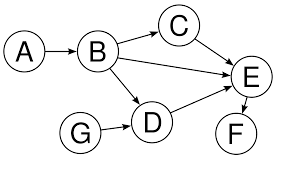

## Cyclic Directed Graph
- The graph has at least one cycle: (DBCE)

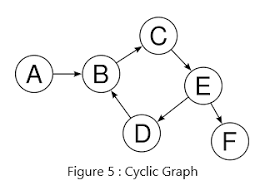

### Cyclic Undirected Graph
- There is at least one closed connected path through the nodes 
- The edges have no direction

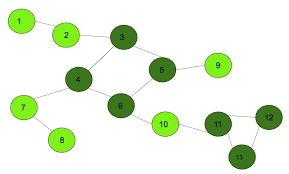

### Features (metadata, attributes)
Nodes and edges can have features attached to them. 
#### Node features
In a social network, nodes are people. Features might be: 
- gender
- age
- race
- education level
- degree
- centrality metrics

#### Edge features
- is parent of
- is friend of
- is teacher of
- referred to 

Every feature $f_i$ can be transformed into a vector in $\Re{n_i}$. This is the case for both node and edge features. If a node has $F$ features, collectively, they are described by a point in $\Re{f}$, where $f$ is the sum of the dimensionalities of all the features per node. We refer to $f$ as the number of features.  

As a simple example, assume that each node has two features: gender, and income level. The gender has two states (Male or Female). The income level has three states (low, medium, high). If each feature becomes a one-hot encoded vector, gender becomes a vector of length two, and income level becomes a vector of length 3. Thus, the collection of two features is represented by a vector of length 5 (3 + 2), and $d=5$. Each node has an associate set of features in $\Re{5}$. 

In general, nodes have features in $\Re{f_V}$, while edges have features in $\Re{f_E}$. Different authors use different notations to denote features. Node features for the entire graph are usually denoted by $X\in \Re{|V|\times f_V}$. Edge features for the entire graph can be represented by a point in $\Re{|E|\times f_E}$. 

If one has a collection of graphs (e.g., a collection of proteins or molecules, which are represented as graphs), these graphs can also have attributes (e.g., odor, strength, elasticity, etc). Given $|G|$ graphs $G_i\in G$, their collective attributes are represented by a point in $\Re{|G|\times f_G}$.

### Graph Representations
Nodes, edges, and graphs are entities that are connected to each other and describe a structure. They have metadata associated with them. 

Embeddings are vector representations. Any entity can be represented by a vector in $\Re{d}$ where $d$ is the dimension of the embedding. Nodes, edges, and graphs can have their own embeddings of dimensions $d_V$, $d_E$, and $d_G$, respectively. 

### Why Embeddings?
A node embedding is a point in $\Re{f_V}$. Nodes that are similar should have similar embeddings, i.e., be close in $\Re{f_V}$. Different algorithms have different notions of embeddings. 

#### Similarity
When are two nodes similar? 
- their features might be similar
- the topological structure of their neighborhoods might be similar. 

### Similarity of features
When are two people likely to be friends on a social network? 
Answer: when the features of these two people are sufficiently similar: 
    - politics
    - movies
    - books
    - foods
    - culture
    - ...
    
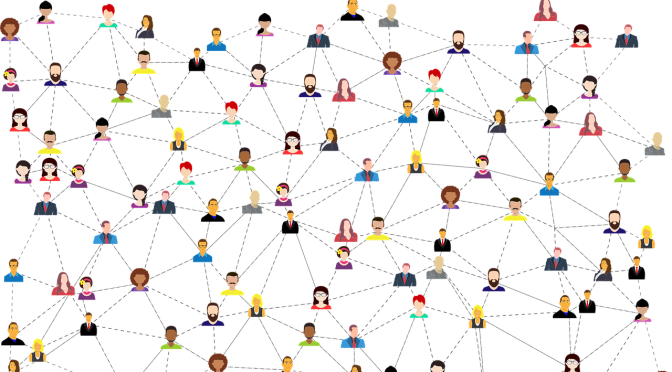

### Similarity of topology
Consider the connections between airports in the United States. When would two airports be considered similar. 
One possible answer: when the connection topology at the two airports are similar. 

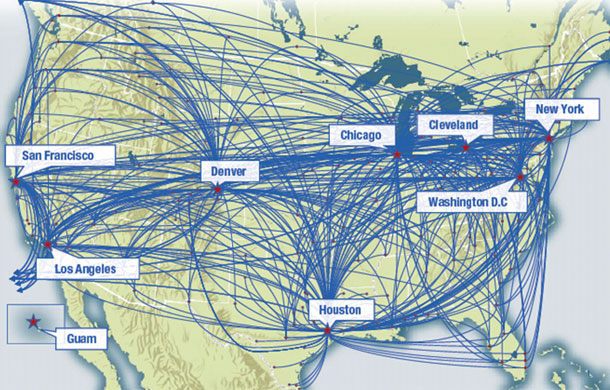

## General structure of a Graph Neural Network

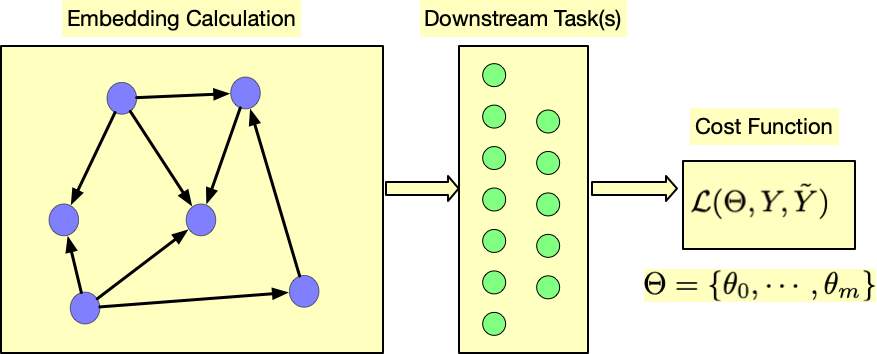

#### Most graph-related problems take the following form: 
- Start with one or more graphs
- Transform nodes, edges, graph (with their features) into embeddings in some Euclidean space
- Use these embeddings as input into a downstream network to generate an output $\tilde{Y}$
- Caculate a cost function ${\cal L}$ that depends on the parameters $\Theta$ of the Neural Network
- Miminize this cost function with respect to $\Theta$
- Let $\Theta^*$ minimize the cost function
- The network parametrized by $\Theta^*$ can be used for a variety of tasks: 
    - node, edge, graph classification
    - link prediction
    - regression problems

***
## Resources
### Main Book used- W. Hamilton: [G
[Graph Representation Learning](https://www.cs.mcgill.ca/~wlh/grl_book/), 2020. 

### Additional Books
- [I. Goodfellow, Y. Bengio, and A. Courville. Deep Learning. MIT press, 2016](https://www.deeplearningbook.org)
- [M. Newman. Networks, an Introduction. Oxford University Press, 2010](https://math.bme.hu/~gabor/oktatas/SztoM/Newman_Networks.pdf)

### Fundamental papers
- P. Battaglia et al. [Relational inductive biases, deep learning, and graph networks](https://arxiv.org/pdf/1806.01261.pdf). arXiv preprint arXiv:1806.01261, 2018

- J. Bruna, W. Zaremba, and Y. Szlam, A.and LeCun. [Spectral networks and locally connected networks on graphs](https://arxiv.org/pdf/1312.6203.pdf%20http://arxiv.org/abs/1312.6203.pdf). In ICLR, 2014.

- N. De Cao and T. Kipf. [MolGAN: An implicit generative model for small molecular graphs](https://arxiv.org/pdf/1805.11973.pdf%20http://arxiv.org/abs/1805.11973.pdf). arXiv preprint arXiv:1805.11973, 2018.

- I. Goodfellow, J. Pouget-Abadie, M. Mirza, B. Xu, D. Warde-Farley, S. Ozair, A. Courville, and Y. Bengio. [Generative adversarial nets](https://proceedings.neurips.cc/paper/2014/file/5ca3e9b122f61f8f06494c97b1afccf3-Paper.pdf). In NeurIPS, 2014.  (not graph-related)

- A. Grover and J. Leskovec. [node2vec: Scalable feature learning for networks](https://dl.acm.org/doi/pdf/10.1145/2939672.2939754?casa_token=R5w-TXIQGiEAAAAA:Tgz9d8eifUfB3zTR5rwClTGf2zz_xUjFZMOWq3hd3o6JbKYgGPrJSg9skjUPQ7JsDBPtmTL4LG-54g). In KDD, 2016.

- W. Hu, B. Liu, J. Gomes, M. Zitnik, P. Liang, V. Pande, and J. Leskovec. [Strategies for pre-training graph neural networksi](https://arxiv.org/pdf/1905.12265). 2019.

- D. Kingma and M. Welling. [Auto-encoding variational Bayes](https://arxiv.org/pdf/1312.6114.pdf?source=post_page---------------------------). arXiv preprint arXiv:1312.6114, 2013.

- T.N. Kipf and M. Welling. [Semi-supervised classiﬁcation with graph convolutional networks](https://arxiv.org/pdf/1609.02907.pdf?fbclid=IwAR0BgJeoKHIAvPuSE9fJ0_IQOEu5l75yxyNo7PUC08RTOFlm_IIo5YmcnQM). In ICLR, 2016a.

- T.N. Kipf and M. Welling. [Variational graph auto-encoders](https://arxiv.org/pdf/1611.07308.pdf%5D). In NeurIPS Workshop on Bayesian Deep Learning, 2016b.

- Y. Li, D. Tarlow, M. Brockschmidt, and R. Zemel. [Gated graph sequence neural networks](https://arxiv.org/pdf/1511.05493.pdf). In ICLR, 2015.

- R. Liao, Y. Li, Y. Song, S. Wang, W.L. Hamilton, D. Duvenaud, R. Urtasun, and R. Zemel. [Eﬃcient graph generation with graph recurrent attention networks](https://arxiv.org/pdf/1910.00760.pdf?utm_channel=SOCIAL). In NeurIPS, 2019a.

- Y. Li, O. Vinyals, C. Dyer, R. Pascanu, and P. Battaglia. [Learning deep generative models of graphs](https://arxiv.org/pdf/1803.03324.pdf). In ICML, 2018.

- A. Ortega, P. Frossard, J. Kovaˇcevi´c, J. Moura, and P. Vandergheynst. [Graph signal processing: Overview, challenges, and applications](http://wds.ac.cn/portal/summer2019/paper/12.pdf). Proc. IEEE, 106 (5):808–828, 2018.

- B. Perozzi, R. Al-Rfou, and S. Skiena. [Deepwalk: Online learning of social representations](https://dl.acm.org/doi/pdf/10.1145/2623330.2623732?casa_token=sl7FhnSnm34AAAAA:zF8Bn8a2hoFUO8WJtxEAubvOEOsbkI1r80R-eY1K3wg5dvOuZqmtpOIDMil30pfB-sDCasuDcWSGhQ). In KDD, 2014.

- M. Qu, Y. Bengio, and J. Tang. [GMNN: Graph markov neural networks](http://proceedings.mlr.press/v97/qu19a/qu19a.pdf). In ICML, 2019.

- F. Scarselli, M. Gori, A.C. Tsoi, M. Hagenbuchner, and G. Monfardini. [The graph neural network model](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.1015.7227&rep=rep1&type=pdf). IEEE Trans. Neural Netw. Learn. Syst, 20(1): 61–80, 2009.

- M. Schlichtkrull, T.N. Kipf, P. Bloem, R. van den Berg, I. Titov, and M. Welling. [Modeling relational data with graph convolutional networks](https://arxiv.org/pdf/1703.06103.pdf). In European Semantic Web Conference, 2017.

- M. Simonovsky and N. Komodakis. [GraphVAE: Towards generation of small graphs using variational autoencoders](https://arxiv.org/pdf/1802.03480.pdf). In International Conference on Artiﬁcial Neural Networks, 2018.

- F. Sun, J. Hoﬀmann, and J. Tang. [Infograph: Unsupervised and semi-supervised graph-level representation learning via mutual information maximization](https://arxiv.org/pdf/1908.01000.pdf). In ICLR, 2020.

- K. Teru, E. Denis, and W.L. Hamilton. [Inductive relation prediction on knowledge graphs](http://proceedings.mlr.press/v119/teru20a/teru20a.pdf). In ICML, 2020.

- A. Vaswani, N. Shazeer, N. Parmar, J. Uszkoreit, L. Jones, A. Gomez, L. Kaiser, and I. Polosukhin. [Attention is all you need](https://proceedings.neurips.cc/paper/2017/file/3f5ee243547dee91fbd053c1c4a845aa-Paper.pdf). In NeurIPS, 2017.  (not a paper on graphs)

- P. Veliˇckovi´c, G. Cucurull, A. Casanova, A. Romero, P. Lio, and Y. Bengio. [Graph attention networks](https://arxiv.org/pdf/1710.10903.pdf). In ICLR, 2018.

- P. Veliˇckovi´c, W. Fedus, W.L. Hamilton, P. Li`o, Y. Bengio, and R.D. Hjelm. [Deep graph infomax](https://arxiv.org/pdf/1809.10341.pdf). In ICLR, 2019.

- F. Wu, T. Zhang, C. Souza, A.and Fifty, T. Yu, and K. Weinberger. [Simplifying graph convolutional networks](http://proceedings.mlr.press/v97/wu19e/wu19e.pdf). In ICML, 2019.

- K. Xu, W. Hu, J. Leskovec, and S. Jegelka. [How powerful are graph neural networks?](https://arxiv.org/pdf/1810.00826.pdf) In ICLR, 2019.

- B. Yang, W. Yih, X. He, J. Gao, and L. Deng. [Embedding entities and relations for learning and inference in knowledge bases](https://arxiv.org/pdf/1412.6575.pdf). In ICLR.

### Useful Blogs
Blogs often distill the contents of papers in easier to understand language and are highly recommended to gain a deeper understanding of a subject before returning to the paper. 

- [Graph Neural Networks (GNN, GAE, STGNN)](https://jonathan-hui.medium.com/graph-neural-networks-gnn-gae-stgnn-1ac0b5c99550)

- [Graph Convolutional Networks (GCN) & Pooling](https://jonathan-hui.medium.com/graph-convolutional-networks-gcn-pooling-839184205692)

- [GNN Book](https://www.instapaper.com/read/1472192758)

- [Graph Neural Network Resources](https://www.instapaper.com/read/1472192474)

- [Top Applications of Graph Neural Networks 2021](https://medium.com/criteo-engineering/top-applications-of-graph-neural-networks-2021-c06ec82bfc18)

- [Applications of Graph Neural Networks (GNN)](https://jonathan-hui.medium.com/applications-of-graph-neural-networks-gnn-d487fd5ed17d)

- [Applications of Graph Neural Networks](https://www.instapaper.com/read/1450389189)

- [Graph Neural Network and Some of GNN Applications: Everything You Need to Know - neptune.ai](https://www.instapaper.com/read/1450383537)

- [Link Prediction in Social Networks](https://www.instapaper.com/read/1471426078)

- [Graph Representation Learning](https://dsgiitr.com/work/graph_nets/)

- [Understanding Convolutions on Graphs](https://distill.pub/2021/understanding-gnns/)

- [A Gentle Introduction to Graph Neural Networks](https://distill.pub/2021/gnn-intro/)

- [Graph Representation Learning](https://towardsdatascience.com/graph-representation-learning-dd64106c9763)

- [Towards Explainable Graph Neural Networks](https://www.instapaper.com/read/1467172849)

- [Hands-on Graph Neural Networks with PyTorch & PyTorch Geometric](https://towardsdatascience.com/hands-on-graph-neural-networks-with-pytorch-pytorch-geometric-359487e221a8)

- [How to do Deep Learning on Graphs with Graph Convolutional Networks](https://towardsdatascience.com/how-to-do-deep-learning-on-graphs-with-graph-convolutional-networks-7d2250723780). 
Part 1: A High-Level Introduction to Graph Convolutional Networks

- [How to do Deep Learning on Graphs with Graph Convolutional Networks](https://towardsdatascience.com/how-to-do-deep-learning-on-graphs-with-graph-convolutional-networks-62acf5b143d0).
Part 2: Semi-Supervised Learning with Spectral Graph Convolutions

- [How powerful are Graph Convolutions?](https://www.inference.vc/how-powerful-are-graph-convolutions-review-of-kipf-welling-2016-2/)

- [A Tale of Two Convolutions: Differing Design Paradigms for Graph Neural Networks](https://towardsdatascience.com/a-tale-of-two-convolutions-differing-design-paradigms-for-graph-neural-networks-8dadffa5b4b0)

- [Graph Neural Network Project Update! (I'm coding GAT from scratch)](https://www.instapaper.com/read/1448865863)

- [Graph Attention Network Project Walkthrough](https://www.instapaper.com/read/1448865850)

- [The Annotated GAT (Cora)](https://github.com/gordicaleksa/pytorch-GAT/blob/main/The%20Annotated%20GAT%20(Cora).ipynb)
- [GAT - Graph Attention Network (PyTorch)](https://github.com/gordicaleksa/pytorch-GAT)
- [Transformers are Graph Neural Networks](https://thegradient.pub/transformers-are-graph-neural-networks/)





***
## Sections to study from Hamilon's book
### Node Embeddings
- Neighborhood Reconstruction Methods (pp 29 - 37)
- Multi-relational Data and Knowledge Graphs (pp 38 - 45)
### Graph Neural Networks
- Neural Message Passing (pp 48-52)
- Generalized Neighborhood Aggregation (pp 52-57)
- Generalized Update Methods (pp 58-62)
- Edge Features and Multi-relational GNNs (pp 62-63)
- Graph Pooling (pp. 64-66)
- Generalized Message Passing (pp. 66-67) + paper by Battaglia: [Relational inductive biases, deep learning, and graph networks](https://arxiv.org/pdf/1806.01261.pdf)
### Graph Neural Networks in Practice
- Applications and Loss Functions (pp 68-71)
- Efficiency Concerns and Node Sampling (p 72-73) and Parameter Sharing and Regularization (73-74). 
### Generative Graph Models
- Variational Autoencoder Approaches (pp 109-113)
- Adversarial Approaches (115-116)
- Autoregressive Methods (117-119)